In [16]:
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt

In [3]:
probs = torch.ones(6)/6
probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

一共摇count次
每次实验摇count/times次, 做times次实验
所以最后的结果是times*probs.shape[0]

In [9]:
count = 10**5
times = 500
res = multinomial.Multinomial(int(count/times),probs).sample((times,))
res.shape

torch.Size([500, 6])

In [10]:
res

tensor([[40., 33., 27., 41., 31., 28.],
        [36., 27., 43., 29., 36., 29.],
        [31., 30., 33., 39., 33., 34.],
        ...,
        [25., 32., 37., 40., 28., 38.],
        [32., 29., 35., 32., 38., 34.],
        [40., 43., 23., 24., 35., 35.]])

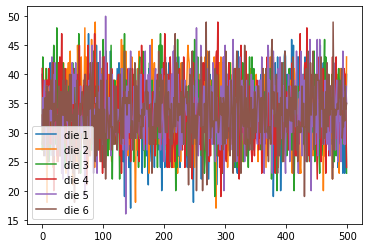

In [19]:
for i in range(probs.shape[0]):
    plt.plot(res[:,i],label=f"die {i+1}")
plt.legend() # 需要加上这一句才能显示图例
plt.show()

上面这种显示方法看起来很凌乱

In [13]:
cum_res = res.cumsum(dim=0)
cum_res

tensor([[   40.,    33.,    27.,    41.,    31.,    28.],
        [   76.,    60.,    70.,    70.,    67.,    57.],
        [  107.,    90.,   103.,   109.,   100.,    91.],
        ...,
        [16560., 16580., 16583., 16536., 16681., 16660.],
        [16592., 16609., 16618., 16568., 16719., 16694.],
        [16632., 16652., 16641., 16592., 16754., 16729.]])

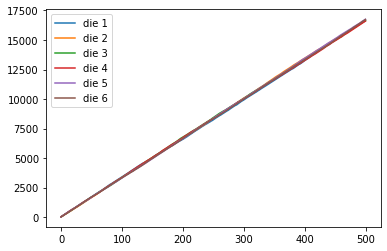

In [22]:
for i in range(probs.shape[0]):
    plt.plot(cum_res[:,i],label=f"die {i+1}")
plt.legend()
plt.show()

后面的累计值太大, 使得某次实验时各个点数出现次数的区分度太小

可以将某次实验时所有点数出现的次数求和, 单个点数出现的次数/总次数

归一化为比例

In [24]:
cum_res.sum()

tensor(25050000.)

In [25]:
cum_res.sum(dim=1)

tensor([   200.,    400.,    600.,    800.,   1000.,   1200.,   1400.,   1600.,
          1800.,   2000.,   2200.,   2400.,   2600.,   2800.,   3000.,   3200.,
          3400.,   3600.,   3800.,   4000.,   4200.,   4400.,   4600.,   4800.,
          5000.,   5200.,   5400.,   5600.,   5800.,   6000.,   6200.,   6400.,
          6600.,   6800.,   7000.,   7200.,   7400.,   7600.,   7800.,   8000.,
          8200.,   8400.,   8600.,   8800.,   9000.,   9200.,   9400.,   9600.,
          9800.,  10000.,  10200.,  10400.,  10600.,  10800.,  11000.,  11200.,
         11400.,  11600.,  11800.,  12000.,  12200.,  12400.,  12600.,  12800.,
         13000.,  13200.,  13400.,  13600.,  13800.,  14000.,  14200.,  14400.,
         14600.,  14800.,  15000.,  15200.,  15400.,  15600.,  15800.,  16000.,
         16200.,  16400.,  16600.,  16800.,  17000.,  17200.,  17400.,  17600.,
         17800.,  18000.,  18200.,  18400.,  18600.,  18800.,  19000.,  19200.,
         19400.,  19600.,  19800.,  2000

In [27]:
cum_res / cum_res.sum(dim=1)

RuntimeError: The size of tensor a (6) must match the size of tensor b (500) at non-singleton dimension 1

In [28]:
cum_res.shape

torch.Size([500, 6])

In [29]:
cum_res.sum(dim=1).shape

torch.Size([500])

In [30]:
cum_res_norm = cum_res/cum_res.sum(dim=1,keepdim=True)
cum_res_norm

tensor([[0.2000, 0.1650, 0.1350, 0.2050, 0.1550, 0.1400],
        [0.1900, 0.1500, 0.1750, 0.1750, 0.1675, 0.1425],
        [0.1783, 0.1500, 0.1717, 0.1817, 0.1667, 0.1517],
        ...,
        [0.1663, 0.1665, 0.1665, 0.1660, 0.1675, 0.1673],
        [0.1663, 0.1664, 0.1665, 0.1660, 0.1675, 0.1673],
        [0.1663, 0.1665, 0.1664, 0.1659, 0.1675, 0.1673]])

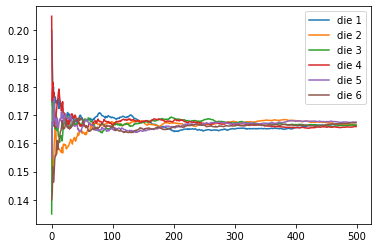

In [33]:
for i in range(probs.shape[0]):
    plt.plot(cum_res_norm[:,i],label = f"die {i+1}")
plt.legend()
plt.show()